In [1]:
# Analysis of Titanic data (Kaggle competition)

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as s
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)

In [3]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
# print column names with NaNs
[x for x in data if any(data[x].isnull())]

['Age', 'Cabin', 'Embarked']

In [7]:
s.nanmean(data.Age)

29.69911764705882

In [8]:
AgeMedian = s.nanmedian(data.Age)
AgeMedian

28.0

In [9]:
# Fill missing data in the Age column with the median
data.Age = data.Age.fillna(AgeMedian)

In [10]:
# recoding the sex column

# data[data["Sex"] == "male"] = data[data["Sex"] == "male"].replace('male',0)
# data[data["Sex"] == "female"] = data[data["Sex"] == "female"].replace('female',1)

#This is porbably shorter. The above also works though.
data = data.replace('male',0)
data = data.replace('female',1)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,S


In [11]:
data.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [12]:
# Replace missing values in the Embarked column with 'S' (most common)
data.Embarked = data.Embarked.fillna('S')
#data = data.Embarked.isnull()
data.head(70)

data.loc[data["Embarked"] == "S", "Embarked"] = 0
data.loc[data["Embarked"] == "C", "Embarked"] = 1
data.loc[data["Embarked"] == "Q", "Embarked"] = 2

In [13]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,0


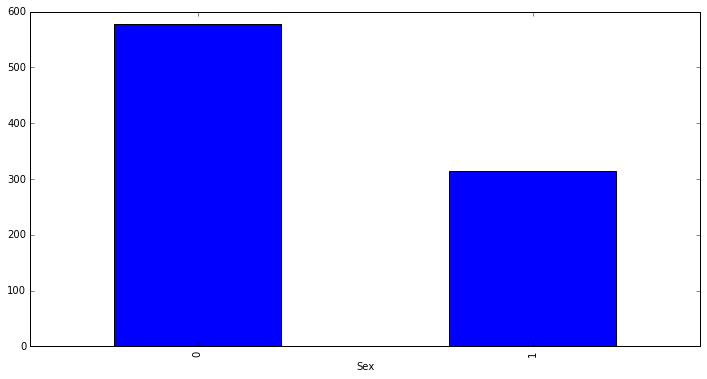

In [14]:
a = data.groupby('Sex').PassengerId.count()
a.plot(kind = 'bar')

In [15]:
# Find all Jonathans on board
import re
#df = data.head(20)
#names = df[df.Age < 10].Name
data.Name
jonathans = [re.findall(r'w+',x) for x in data.Name]
#len(jonathans)
#re.search(r'^Pal',names[0])
#data.loc[1,'Name']

In [16]:
# Fitting a linear regression

# Import the linear regression class
from sklearn.linear_model import LinearRegression
# Sklearn also has a helper that makes it easy to do cross validation
from sklearn.cross_validation import KFold

# The columns we'll use to predict the target
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

# Initialize our algorithm class
alg = LinearRegression()
# Generate cross validation folds for the titanic dataset.  It return the row indices corresponding to train and test.
# We set random_state to ensure we get the same splits every time we run this.
kf = KFold(data.shape[0], n_folds=3, random_state=1)

In [17]:
predictions = []
for train, test in kf:
    # The predictors we're using the train the algorithm.  Note how we only take the rows in the train folds.
    train_predictors = (data[predictors].iloc[train,:])
    # The target we're using to train the algorithm.
    train_target = data["Survived"].iloc[train]
    # Training the algorithm using the predictors and target.
    alg.fit(train_predictors, train_target)
    # We can now make predictions on the test fold
    test_predictions = alg.predict(data[predictors].iloc[test,:])
    predictions.append(test_predictions)

In [18]:
len(predictions[0])*3

891

In [19]:
np.concatenate([[[1,2,3],[4,5,6]],[[11,12,13],[14,15,16]]],axis=1)

array([[ 1,  2,  3, 11, 12, 13],
       [ 4,  5,  6, 14, 15, 16]])

In [20]:
# Evaluate error rate

import numpy as np

# The predictions are in three separate numpy arrays.  Concatenate them into one.  
# We concatenate them on axis 0, as they only have one axis.
predictions = np.concatenate(predictions, axis=0)

# Map predictions to outcomes (only possible outcomes are 1 and 0)
predictions[predictions > .5] = 1
predictions[predictions <=.5] = 0

In [21]:
(predictions == data["Survived"]).head(10)

0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
8    True
9    True
Name: Survived, dtype: bool

In [22]:
len(predictions)

891

In [23]:
sum(predictions == data["Survived"])

698

In [24]:
accuracy = sum([predictions == data["Survived"]]) / float(len(predictions))
accuracy

0      0.001122
1      0.001122
2      0.001122
3      0.001122
4      0.001122
5      0.001122
6      0.001122
7      0.001122
8      0.001122
9      0.001122
10     0.001122
11     0.001122
12     0.001122
13     0.001122
14     0.000000
15     0.001122
16     0.001122
17     0.000000
18     0.000000
19     0.001122
20     0.001122
21     0.000000
22     0.001122
23     0.001122
24     0.000000
25     0.000000
26     0.001122
27     0.001122
28     0.001122
29     0.001122
         ...   
861    0.001122
862    0.001122
863    0.001122
864    0.001122
865    0.001122
866    0.001122
867    0.001122
868    0.001122
869    0.000000
870    0.001122
871    0.001122
872    0.001122
873    0.001122
874    0.001122
875    0.001122
876    0.001122
877    0.001122
878    0.001122
879    0.001122
880    0.001122
881    0.001122
882    0.000000
883    0.001122
884    0.001122
885    0.000000
886    0.001122
887    0.001122
888    0.000000
889    0.000000
890    0.001122
Name: Survived, dtype: f

In [25]:
# Predict using logistic regression
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression

# Initialize our algorithm
alg = LogisticRegression(random_state=1)
# Compute the accuracy score for all the cross validation folds.  (much simpler than what we did before!)
scores = cross_validation.cross_val_score(alg, data[predictors], data["Survived"], cv=3)
# Take the mean of the scores (because we have one for each fold)
print(scores.mean())

0.787878787879


In [26]:
# Process titanic_test the same way we processed titanic.

# This involved:
# * Replace the missing values in the "Age" column with the median age from the train set. 
# The age has to be the exact same value we replaced the missing ages in the training set with
# (it can't be the median of the test set, because this is different). 
# You should use titanic["Age"].median() to find the median.

# Replace any male values in the Sex column with 0, and any female values with 1.
# Fill any missing values in the Embarked column with S.
# In the Embarked column, replace S with 0, C with 1, and Q with 2.
# We'll also need to replace a missing value in the Fare column. 
# Use .fillna with the median of the column in the test set to replace this. 
# There are no missing values in the Fare column of the training set, but test sets can sometimes be different.

In [27]:
test_data = pd.read_csv('train.csv')

# print column names with NaNs
[x for x in test_data if any(pd.isnull(test_data[x]))]

test_data.Age = test_data.Age.fillna(data.Age.median())

In [28]:
test_data = test_data.replace('male',0)
test_data = test_data.replace('female',1)

In [29]:
test_data[pd.isnull(test_data.Embarked)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",1,38,0,0,113572,80,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62,0,0,113572,80,B28,NaN


In [33]:
test_data.Embarked = test_data.Embarked.fillna('S')

In [35]:
test_data.Embarked = test_data.Embarked.replace('S',0)
test_data.Embarked = test_data.Embarked.replace('C',1)
test_data.Embarked = test_data.Embarked.replace('Q',2)

In [36]:
pd.unique(test_data.Embarked)

array([0, 1, 2])

In [38]:
any(pd.isnull(test_data.Fare))

False

In [47]:
# Preparing a submission
# Initialize the algorithm class
alg = LogisticRegression(random_state=1)

# Train the algorithm using all the training data
alg.fit(data[predictors], data["Survived"])

# Make predictions using the test set.
predictions = alg.predict(test_data[predictors])

# Create a new dataframe with only the columns Kaggle wants from the dataset.
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": predictions
    })

submission.to_csv("kaggle.csv", index=False)